In [1]:
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [2]:
# 读入数据

data  = [] #初始化
#使用with语句优势：1.自动关闭文件句柄；2.自动显示（处理）文件读取数据异常
with open("arxiv-metadata-oai-snapshot.json", 'r') as f: 
    for line in f: 
        data.append(json.loads(line))
        
data = pd.DataFrame(data) #将list变为dataframe格式，方便使用pandas进行分析
data.shape #显示数据大小

(1796911, 14)

In [3]:
data.head() #显示数据的前五行

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [4]:
'''
count：一列数据的元素个数；
unique：一列数据中元素的种类；
top：一列数据中出现频率最高的元素；
freq：一列数据中出现频率最高的元素的个数；
'''

data["categories"].describe()

count      1796911
unique       62055
top       astro-ph
freq         86914
Name: categories, dtype: object

In [14]:
# 所有的种类(独立的)

unique_categories = set([i for l in [x.split(' ') for x in data["categories"]] for i in l])  # 提取所有的种类，每个样本可能有多个种类；多个样本可能有相同的种类
len(unique_categories)

173

In [13]:
unique_categories

{'acc-phys',
 'adap-org',
 'alg-geom',
 'ao-sci',
 'astro-ph',
 'astro-ph.CO',
 'astro-ph.EP',
 'astro-ph.GA',
 'astro-ph.HE',
 'astro-ph.IM',
 'astro-ph.SR',
 'atom-ph',
 'bayes-an',
 'chao-dyn',
 'chem-ph',
 'cmp-lg',
 'comp-gas',
 'cond-mat',
 'cond-mat.dis-nn',
 'cond-mat.mes-hall',
 'cond-mat.mtrl-sci',
 'cond-mat.other',
 'cond-mat.quant-gas',
 'cond-mat.soft',
 'cond-mat.stat-mech',
 'cond-mat.str-el',
 'cond-mat.supr-con',
 'cs.AI',
 'cs.AR',
 'cs.CC',
 'cs.CE',
 'cs.CG',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.DB',
 'cs.DC',
 'cs.DL',
 'cs.DM',
 'cs.DS',
 'cs.ET',
 'cs.FL',
 'cs.GL',
 'cs.GR',
 'cs.GT',
 'cs.HC',
 'cs.IR',
 'cs.IT',
 'cs.LG',
 'cs.LO',
 'cs.MA',
 'cs.MM',
 'cs.MS',
 'cs.NA',
 'cs.NE',
 'cs.NI',
 'cs.OH',
 'cs.OS',
 'cs.PF',
 'cs.PL',
 'cs.RO',
 'cs.SC',
 'cs.SD',
 'cs.SE',
 'cs.SI',
 'cs.SY',
 'dg-ga',
 'econ.EM',
 'econ.GN',
 'econ.TH',
 'eess.AS',
 'eess.IV',
 'eess.SP',
 'eess.SY',
 'funct-an',
 'gr-qc',
 'hep-ex',
 'hep-lat',
 'hep-ph',
 'hep-th',
 'm

In [6]:
data["year"] = pd.to_datetime(data["update_date"]).dt.year #将update_date从例如2019-02-20的str变为datetime格式，并提取处year
del data["update_date"] #删除 update_date特征，其使命已完成
data = data[data["year"] >= 2019] #找出 year 中2019年以后的数据，并将其他数据删除
# data.groupby(['categories','year']) #以 categories 进行排序，如果同一个categories 相同则使用 year 特征进行排序
data.reset_index(drop=True, inplace=True) #重新编号
data #查看结果

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,authors_parsed,year
0,0704.0297,Sung-Chul Yoon,"Sung-Chul Yoon, Philipp Podsiadlowski and Step...",Remnant evolution after a carbon-oxygen white ...,"15 pages, 15 figures, 3 tables, submitted to M...",None,10.1111/j.1365-2966.2007.12161.x,None,astro-ph,None,We systematically explore the evolution of t...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...","[[Yoon, Sung-Chul, ], [Podsiadlowski, Philipp,...",2019
1,0704.0342,Patrice Ntumba Pungu,B. Dugmore and PP. Ntumba,Cofibrations in the Category of Frolicher Spac...,27 pages,None,None,None,math.AT,None,Cofibrations are defined in the category of ...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...","[[Dugmore, B., ], [Ntumba, PP., ]]",2019
2,0704.0360,Zaqarashvili,T.V. Zaqarashvili and K Murawski,Torsional oscillations of longitudinally inhom...,"6 pages, 3 figures, accepted in A&A",None,10.1051/0004-6361:20077246,None,astro-ph,None,We explore the effect of an inhomogeneous ma...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...","[[Zaqarashvili, T. V., ], [Murawski, K, ]]",2019
3,0704.0525,"Sezgin Ayg\""un","Sezgin Aygun, Ismail Tarhan, Husnu Baysal",On the Energy-Momentum Problem in Static Einst...,This submission has been withdrawn by arXiv ad...,"Chin.Phys.Lett.24:355-358,2007",10.1088/0256-307X/24/2/015,None,gr-qc,None,This paper has been removed by arXiv adminis...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...","[[Aygun, Sezgin, ], [Tarhan, Ismail, ], [Baysa...",2019
4,0704.0535,Antonio Pipino,"Antonio Pipino (1,3), Thomas H. Puzia (2,4), a...",The Formation of Globular Cluster Systems in M...,"32 pages (referee format), 9 figures, ApJ acce...","Astrophys.J.665:295-305,2007",10.1086/519546,None,astro-ph,None,The most massive elliptical galaxies show a ...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...","[[Pipino, Antonio, ], [Puzia, Thomas H., ], [M...",2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395118,quant-ph/9911051,Stephen A. Fulling,S. A. Fulling,"Large Numbers, the Chinese Remainder Theorem, ...",9 pages; Plain TeX with vanilla.sty and pictex...,"Phys. Rev. Applied 13, 024016 (2020)",10.1103/PhysRevApplied.13.024016,None,quant-ph,None,This is a pedagogical article cited in the f...,"[{'version': 'v1', 'created': 'Thu, 11 Nov 199...","[[Fulling, S. A., ]]",2020
395119,solv-int/9511005,Wen-Xiu Ma,"Wen-Xiu Ma, Benno Fuchssteiner",Explicit and Exact Solutions to a Kolmogorov-P...,"14pages, Latex, to appear in Intern. J. Nonlin...",None,10.1016/0020-7462(95)00064-X,None,solv-int nlin.SI,None,Some explicit traveling wave solutions to a ...,"[{'version': 'v1', 'created': 'Tue, 14 Nov 199...","[[Ma, Wen-Xiu, ], [Fuchssteiner, Benno, ]]",2019
395120,solv-int/9809008,Victor Enolskii,"J C Eilbeck, V Z Enol'skii, V B Kuznetsov, D V...",Linear r-Matrix Algebra for a Hierarchy of One...,"plain LaTeX, 28 pages",None,None,None,solv-int nlin.SI,None,We consider a hierarchy of many-particle sys...,"[{'version': 'v1', 'created': 'Wed, 2 Sep 1998...","[[Eilbeck, J C, ], [Enol'skii, V Z, ], [Kuznet...",2019
395121,solv-int/9909010,Pierre van Moerbeke,"M. Adler, T. Shiota and P. van Moerbeke",Pfaff tau-functions,42 pages,None,None,None,solv-int adap-org hep-th nlin.AO nlin.SI,None,Consider the evolution $$ \frac{\pl m_\iy}{\...,"[{'version': 'v1', 'created': 'Wed, 15 Sep 199...","[[Adler, M., ], [Shiota, T., ], [van Moerbeke,...",2019


In [7]:
#爬取所有的类别
website_url = requests.get('https://arxiv.org/category_taxonomy').text #获取网页的文本数据
soup = BeautifulSoup(website_url,'lxml') #爬取数据，这里使用lxml的解析器，加速
root = soup.find('div',{'id':'category_taxonomy_list'}) #找出 BeautifulSoup 对应的标签入口
tags = root.find_all(["h2","h3","h4","p"], recursive=True) #读取 tags

#初始化 str 和 list 变量
level_1_name = ""
level_2_name = ""
level_2_code = ""
level_1_names = []
level_2_codes = []
level_2_names = []
level_3_codes = []
level_3_names = []
level_3_notes = []

#进行
for t in tags:
    if t.name == "h2":
        level_1_name = t.text    
        level_2_code = t.text
        level_2_name = t.text
    elif t.name == "h3":
        raw = t.text
        level_2_code = re.sub(r"(.*)\((.*)\)",r"\2",raw) #正则表达式：模式字符串：(.*)\((.*)\)；被替换字符串"\2"；被处理字符串：raw
        level_2_name = re.sub(r"(.*)\((.*)\)",r"\1",raw)
    elif t.name == "h4":
        raw = t.text
        level_3_code = re.sub(r"(.*) \((.*)\)",r"\1",raw)
        level_3_name = re.sub(r"(.*) \((.*)\)",r"\2",raw)
    elif t.name == "p":
        notes = t.text
        level_1_names.append(level_1_name)
        level_2_names.append(level_2_name)
        level_2_codes.append(level_2_code)
        level_3_names.append(level_3_name)
        level_3_codes.append(level_3_code)
        level_3_notes.append(notes)

#根据以上信息生成dataframe格式的数据
df_taxonomy = pd.DataFrame({
    'group_name' : level_1_names,
    'archive_name' : level_2_names,
    'archive_id' : level_2_codes,
    'category_name' : level_3_names,
    'categories' : level_3_codes,
    'category_description': level_3_notes
    
})

#按照 "group_name" 进行分组，在组内使用 "archive_name" 进行排序
df_taxonomy.groupby(["group_name","archive_name"])
df_taxonomy

,group_name,archive_name,archive_id,category_name,categories,category_description
0,Computer Science,Computer Science,Computer Science,Artificial Intelligence,cs.AI,"Covers all areas of AI except Vision, Robotics..."
1,Computer Science,Computer Science,Computer Science,Hardware Architecture,cs.AR,Covers systems organization and hardware archi...
2,Computer Science,Computer Science,Computer Science,Computational Complexity,cs.CC,"Covers models of computation, complexity class..."
3,Computer Science,Computer Science,Computer Science,"Computational Engineering, Finance, and Science",cs.CE,Covers applications of computer science to the...
4,Computer Science,Computer Science,Computer Science,Computational Geometry,cs.CG,Roughly includes material in ACM Subject Class...
...,...,...,...,...,...,...
150,Statistics,Statistics,Statistics,Computation,stat.CO,"Algorithms, Simulation, Visualization"
151,Statistics,Statistics,Statistics,Methodology,stat.ME,"Design, Surveys, Model Selection, Multiple Tes..."
152,Statistics,Statistics,Statistics,Machine Learning,stat.ML,"Covers machine learning papers (supervised, un..."
153,Statistics,Statistics,Statistics,Other Statistics,stat.OT,Work in statistics that does not fit into the ...


In [8]:
import re

phone = "2004-959-559 # 这是一个电话号码"
 
# 删除注释
num = re.sub(r'#.*$', "", phone)
print ("电话号码 : ", num)
 
# 移除非数字的内容
num = re.sub(r'\D', "", phone)
print ("电话号码 : ", num)

电话号码 :  2004-959-559 
电话号码 :  2004959559


In [9]:
re.sub(r"(.*)\((.*)\)",r"\2", " Astrophysics(astro-ph)")

'astro-ph'

In [10]:

_df = data.merge(df_taxonomy, on="categories", how="left").drop_duplicates(["id","group_name"]).groupby("group_name").agg({"id":"count"}).sort_values(by="id",ascending=False).reset_index()

_df

,group_name,id
0,Physics,79985
1,Mathematics,51567
2,Computer Science,40067
3,Statistics,4054
4,Electrical Engineering and Systems Science,3297
5,Quantitative Biology,1994
6,Quantitative Finance,826
7,Economics,576


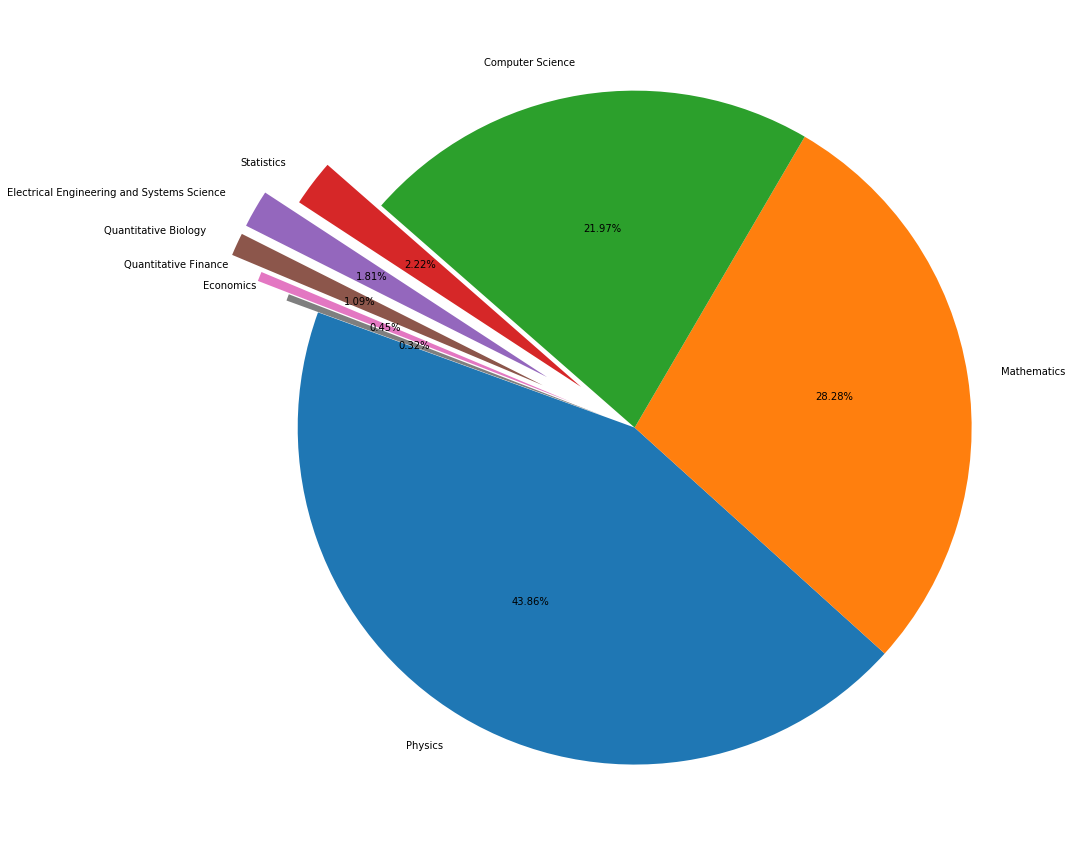

In [11]:
fig = plt.figure(figsize=(15,12))
explode = (0, 0, 0, 0.2, 0.3, 0.3, 0.2, 0.1) 
plt.pie(_df["id"],  labels=_df["group_name"], autopct='%1.2f%%', startangle=160, explode=explode)
plt.tight_layout()
plt.show()

In [12]:
group_name="Computer Science"
cats = data.merge(df_taxonomy, on="categories").query("group_name == @group_name")
cats.groupby(["year","category_name"]).count().reset_index().pivot(index="category_name", columns="year",values="id")

year,2019,2020
category_name,,
Artificial Intelligence,558,757
Computation and Language,2153,2906
Computational Complexity,131,188
"Computational Engineering, Finance, and Science",108,205
Computational Geometry,199,216
Computer Science and Game Theory,281,323
Computer Vision and Pattern Recognition,5559,6517
Computers and Society,346,564
Cryptography and Security,1067,1238
